In [0]:
fileroot = "clinicaltrial_2021"

import os
os.environ['fileroot'] = fileroot

In [0]:
new1 = ("/FileStore/tables/"+fileroot+".csv")

In [0]:
for line in dbutils.fs.head("/FileStore/tables/"+fileroot+".csv").splitlines():
    print(line)

[Truncated to first 65536 bytes]
Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions
NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||
NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|
NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|
NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|
NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|
NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate
NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|O

I am just checking the number of missing values in the dataset and i am cleaning these with respect to the question and demand of the solution according to question wise which is given full below in flow with questions.

In [0]:
df = spark.read.format("csv").options(header="True").options(inferschema ="true").options(delimiter = "|").load(new1)
from pyspark.sql.functions import isnull, when, count, col
nacounts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).toPandas()
nacounts

Id 
 Sponsor 
 Status 
 Start 
 Completion 
 Type 
 Submission 
 Conditions 
 Interventions 
 
 
 
 
 0 
 0 
 0 
 0 
 0 
 13260 
 0 
 0 
 65131 
 253837

In [0]:
df.count()

Out[177]: 387261

In [0]:
df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



In [0]:
df.display()

Id Sponsor Status Start Completion Type Submission Conditions Interventions NCT02758028 The University of Hong Kong Recruiting Aug 2005 Nov 2021 Interventional Apr 2016 null null NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autistic Disorder,Autism Spectrum Disorder null NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus null NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Tuberculosis,Lung Diseases,Pulmonary Disease null NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticular Diseases,Diverticulum,Diverticulosis null NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation null NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null NCT02757508 Washington University School of Medicine Completed Mar 2016 Jul 2017 Interventional Apr 2016 null Vitamins NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis null NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy NCT02759276 Daniel Alexandre Bottino Completed May 2015 Dec 2015 Observational Apr 2016 Hypertension null NCT02750956 Bulent Ecevit University Completed Jun 2015 Mar 2016 Observational Apr 2016 Periodontal Diseases null NCT02752113 Institut für Pharmakologie und Präventive Medizin Completed Apr 2016 May 2019 Interventional Apr 2016 Diabetes Mellitus Metformin,Empagliflozin,Linagliptin NCT02752698 The Third Xiangya Hospital of Central South University Active, not recruiting Jan 2015 Dec 2021 Interventional Jun 2015 Appendicitis,Stomach Ulcer,Cholecystolithiasis,Cholelithiasis,Gallstones null NCT02755779 Tel Aviv Medical Center Unknown status Jun 2016 Jun 2017 Observational Apr 2016 null null NCT02750384 Medicines for Malaria Venture Terminated May 2016 Jul 2016 Interventional Apr 2016 null null NCT02754609 James Cook University, Queensland, Australia Completed Sep 2016 Oct 2019 Interventional Apr 2016 Hookworm Infections,Celiac Disease null NCT02755701 Soonchunhyang University Hospital Unknown status Jul 2016 Dec 2018 Interventional Apr 2016 Ascites null NCT02751762 Member Companies of the Opioid PMR Consortium Recruiting Nov 2017 Oct 2022 Observational Apr 2016 Chronic Pain,Substance-Related Disorders,Opioid-Related Disorders,Narcotic-Related Disorders,Behavior null NCT02756299 Marmara University Completed Jun 2014 Apr 2015 Interventional Apr 2016 Sleep Apnea Syndromes,Sleep Apnea null NCT02750709 Cycle Pharmaceuticals Ltd. Completed Oct 2015 Jan 2016 Interventional Apr 2016 Tyrosinemias Nitisinone NCT02753907 Yonsei University Completed Jun 2015 null Interventional Apr 2016 null null NCT02755467 Cutera Inc. Completed May 2016 Apr 2017 Interventional Apr 2016 Hemangioma null NCT02755298 University of Zurich Completed Oct 2016 Nov 2020 Interventional Mar 2016 Hypertension Acetazolamide NCT02759614 Guangdong Association of Clinical Trials Unknown status Apr 2016 Jun 2019 Interventional Mar 2016 Carcinoma Bevacizumab,Erlotinib Hydrochloride NCT02752815 Ruijin Hospital Unknown status Apr 2016 Jun 2020 Interventional Apr 2016 Lymphoma Prednisone,Cyclophosphamide,Rituximab,Vincristine,Epirubicin NCT02757131 The Cleveland Clinic Completed Jul 2016 Jul 2017 Interventional Apr 2016 Iatrogenic Disease null NCT02758704 St. Justine's Hospital Completed Oct 2015 Jun 2021 Interventional Apr 2016 null null NCT02750501 Alcresta Therapeutics, Inc. Completed Jul 2016 Mar 2017 Interventional Apr 2016 Cystic Fibrosis,Fibrosis null NCT02759913 Iron Horse Diagnostics, Inc. Unknown status Jan 2015 De

The number of studies in the dataset. You must ensure that you explicitly check distinct studies.

You should list all the types (as contained in the Type column) of studies in the dataset along with
the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
studiesdf = df.groupby(["Type"]).count()
newdf = studiesdf.orderBy(["count"] , ascending = False)
newdf.show(truncate=False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



What is explode function. Spark SQL explode function is used to create or split an array or map DataFrame columns to rows.

In [0]:
from pyspark.sql.functions import split ,col
from pyspark.sql.functions import explode

In [0]:
conddf=df["Conditions"]

In [0]:
from pyspark.sql.functions import split ,col
from pyspark.sql.functions import explode
expl_conditions = df.withColumn('Conditions',explode(split(df['Conditions'],',')))

The top 5 conditions (from Conditions) with their frequencies.

In [0]:
newdf = expl_conditions.groupby("Conditions").count()
Newcount = newdf.orderBy(["count"],ascending = False)
Newcount.show(5,truncate = False)

+-----------------+-----+
|Conditions       |count|
+-----------------+-----+
|Carcinoma        |13389|
|Diabetes Mellitus|11080|
|Neoplasms        |9371 |
|Breast Neoplasms |8640 |
|Syndrome         |8032 |
+-----------------+-----+
only showing top 5 rows



For the Question number we required the mesh.csv which is the demand of the question and we also need the clinical trails datasets for the functionality to perform and get the desiresd results so first we have to do the same process which we did from the clinical trails dataset.

In [0]:
dbutils.fs.head("dbfs:/FileStore/tables/mesh.csv")

[Truncated to first 65536 bytes]
Out[185]: 'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen, Acute",C23.888.592.612.054.200\r\n"Abdomen, Acute",C23.888.821.030.249\r\nAbdominal Injuries,C26.017\r\nAbdominal Neoplasms,C04.588.033\r\nAbdominal Muscles,A02.633.567.050\r\nCremaster Muscle,A02.633.567.050\r\nPyramidalis Muscle,A02.633.567.050\r\nQuadratus Abdominis,A02.633.567.050\r\nTransversus Abdominis,A02.633.567.050\r\nAbducens Nerve,A08.800.800.120.030\r\nAbelson murine leukemia virus,B04.613.807.375.525.020

In [0]:
mesh = ("dbfs:/FileStore/tables/mesh.csv")

In [0]:
meshdf = spark.read.format("csv")
meshdf1 = meshdf.options(header = "True")
meshdf2 = meshdf1.options(inferschema = "True")
meshdf3  = meshdf2.options(delimiter = ",")
meshdf4 = meshdf3.load(mesh)

In [0]:
meshdf4.printSchema()

root
 |-- term: string (nullable = true)
 |-- tree: string (nullable = true)



Its important to mention here that the descirbe also gives you the summary of the 
whole datasets

Here By seeing the dataset tree we have to see that the our requirement and strings which are required so we have to apply substring operation on the tree column plus here we are making a new column which is named as codes which contains the codes of the each disease so its solution is

In [0]:
meshdf5= meshdf4.withColumn('Keys', meshdf4.tree.substr(1,3))
meshdf5.display()

term tree Keys Calcimycin D03.633.100.221.173 D03 A-23187 D03.633.100.221.173 D03 Temefos D02.705.400.625.800 D02 Temefos D02.705.539.345.800 D02 Temefos D02.886.300.692.800 D02 Abate D02.705.400.625.800 D02 Abate D02.705.539.345.800 D02 Abate D02.886.300.692.800 D02 Difos D02.705.400.625.800 D02 Difos D02.705.539.345.800 D02 Difos D02.886.300.692.800 D02 Abattoirs J01.576.423.200.700.100 J01 Abattoirs J03.540.020 J03 Abbreviations as Topic L01.559.598.400.556.131 L01 Acronyms as Topic L01.559.598.400.556.131 L01 Abdomen A01.923.047 A01 Abdomen, Acute C23.888.592.612.054.200 C23 Abdomen, Acute C23.888.821.030.249 C23 Abdominal Injuries C26.017 C26 Abdominal Neoplasms C04.588.033 C04 Abdominal Muscles A02.633.567.050 A02 Cremaster Muscle A02.633.567.050 A02 Pyramidalis Muscle A02.633.567.050 A02 Quadratus Abdominis A02.633.567.050 A02 Transversus Abdominis A02.633.567.050 A02 Abducens Nerve A08.800.800.120.030 A08 Abelson murine leukemia virus B04.613.807.375.525.020 B04 Abelson murine leukemia virus B04.820.650.375.525.020 B04 Abetalipoproteinemia C16.320.565.398.500.440.500 C16 Abetalipoproteinemia C18.452.584.500.875.440.500 C18 Abetalipoproteinemia C18.452.648.398.500.440.500 C18 Congenital Abnormalities C16.131 C16 Fetal Malformations C16.131 C16 Fetal Anomalies C16.131 C16 Abnormalities, Drug-Induced C16.131.042 C16 Abnormalities, Multiple C16.131.077 C16 Abnormalities, Radiation-Induced C16.131.080 C16 Abnormalities, Radiation-Induced C26.733.031 C26 Abnormalities, Radiation-Induced G01.750.748.500.031 G01 Abnormalities, Radiation-Induced N06.850.460.350.850.500.031 N06 Abnormalities, Radiation-Induced N06.850.810.300.360.031 N06 ABO Blood-Group System D23.050.301.290.031 D23 ABO Blood-Group System D23.050.705.230.031 D23 Blood Group H Type 1 Antigen D23.050.301.290.031 D23 Blood Group H Type 1 Antigen D23.050.705.230.031 D23 ABO Factors D23.050.301.290.031 D23 ABO Factors D23.050.705.230.031 D23 Abomasum A13.869.106 A13 Abortifacient Agents D27.505.696.875.131 D27 Abortifacient Agents D27.505.954.705.131 D27 Abortifacient Effect D27.505.696.875.131 D27 Abortifacient Effect D27.505.954.705.131 D27 Abortifacient Agents, Nonsteroidal D27.505.696.875.131.100 D27 Abortifacient Agents, Nonsteroidal D27.505.954.705.131.100 D27 Abortifacient Agents, Steroidal D27.505.696.875.131.200 D27 Abortifacient Agents, Steroidal D27.505.954.705.131.200 D27 Abortion, Spontaneous C13.703.039 C13 Abortion, Spontaneous G08.686.784.769.496.125 G08 Early Pregnancy Loss C13.703.039 C13 Early Pregnancy Loss G08.686.784.769.496.125 G08 Miscarriage C13.703.039 C13 Miscarriage G08.686.784.769.496.125 G08 Abortion, Tubal C13.703.039 C13 Abortion, Tubal G08.686.784.769.496.125 G08 Abortion Applicants M01.050 M01 Abortion Seekers, Repeated M01.050 M01 Abortion Seekers, Refused M01.050 M01 Abortion, Criminal I01.198.240.089 I01 Abortion, Eugenic E04.520.050.050 E04 Abortion, Selective E04.520.050.050 E04 Abortion, Habitual C13.703.039.089 C13 Abortion, Incomplete C13.703.039.093 C13 Abortion, Induced E04.520.050 E04 Abortion Rate E04.520.050 E04 Abortion Techniques E04.520.050 E04 Abortion, Drug-Induced E04.520.050 E04 Previous Abortion E04.520.050 E04 Abortion, Saline-Solution E04.520.050 E04 Abortion, Soap-Solution E04.520.050 E04 Anti-Abortion Groups E04.520.050 E04 Embryotomy E04.520.050 E04 Fertility Control, Postconception E04.520.050 E04 Abortion Failure E04.520.050 E04 Abortion, Rivanol E04.520.050 E04 Abortion, Legal E04.520.050.055 E04 Abortion on Demand E04.520.050.055 E04 Abortion, Missed C13.703.039.173 C13 Abortion, Septic C01.674.173 C01 Abortion, Septic C13.703.039.256 C13 Abortion, Septic C13.703.700.173 C13 Abortion, Therapeutic E04.520.050.060 E04 Abortion, Threatened C13.703.090 C13 Abortion, Veterinary C13.703.039.422 C13 Abortion, Veterinary C22.021 C22 Abreaction F04.754.720.107 F04 Abrin D08.811.277.450.430.700.750.111 D08 Abrin D12.776.503.499.249 D12 Abrin D12.776.765.678.906.111 D12 Abrin C D08.811.277.450.430.700.750.111 D08 

Now here we have to join the two dataframes one is meshdf5 second one is newcount which is in the

In [0]:
binding = expl_conditions.Conditions == meshdf5.term
Link_joining = expl_conditions.join(meshdf5, on = binding, how = 'inner')
Link_joining.display()

Id Sponsor Status Start Completion Type Submission Conditions Interventions term tree Keys NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autistic Disorder null Autistic Disorder F03.625.164.113.500 F03 NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autism Spectrum Disorder null Autism Spectrum Disorder F03.625.164.113 F03 NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus null Diabetes Mellitus C19.246 C19 NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus null Diabetes Mellitus C18.452.394.750 C18 NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Tuberculosis null Tuberculosis C01.150.252.410.040.552.846 C01 NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Lung Diseases null Lung Diseases C08.381 C08 NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticular Diseases null Diverticular Diseases C06.405.205.282 C06 NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticulum null Diverticulum C23.300.415 C23 NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticulum null Diverticulum C06.405.205.282.750 C06 NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticulosis null Diverticulosis C23.300.415 C23 NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticulosis null Diverticulosis C06.405.205.282.750 C06 NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate Asthma C20.543.480.680.095 C20 NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate Asthma C08.674.095 C08 NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate Asthma C08.381.495.108 C08 NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate Asthma C08.127.108 C08 NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation null Hypoventilation C23.888.852.638 C23 NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation null Hypoventilation C08.618.846.565 C08 NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null Lymphoma C20.683.515.761 C20 NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null Lymphoma C15.604.515.569 C15 NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null Lymphoma C04.557.386 C04 NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis null Myositis C10.668.491.562 C10 NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis null Myositis C05.651.594 C05 NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy Diabetes Mellitus C19.246 C19 NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy Diabetes Mellitus C18.452.394.750 C18 NCT02759276 Daniel Alexandre Bottino Completed May 2015 Dec 

In [0]:
OverallNumbers= Link_joining .select("Keys")\
.groupby(["Keys"]).count()\
.orderBy(["Count"],ascending = False)\
.show(5)

+----+------+
|Keys| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
+----+------+
only showing top 5 rows



Same for checking the records of Pharma.csv

In [0]:
dbutils.fs.head("dbfs:/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]
Out[192]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to i

In [0]:
pharmadf = spark.read.format("csv")
pharmadf1 = pharmadf.options(header = "True")
pharmadf2 = pharmadf1.load("dbfs:/FileStore/tables/pharma.csv")

In [0]:
pharmadf2.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: string (nullable = true)
 |-- Penalty_Date: string (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string (

In [0]:
pharmadf2.display()

Company Parent_Company Penalty_Amount Subtraction_From_Penalty Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting Penalty_Year Penalty_Date Offense_Group Primary_Offense Secondary_Offense Description Level_of_Government Action_Type Agency Civil/Criminal Prosecution_Agreement Court Case_ID Private_Litigation_Case_Title Lawsuit_Resolution Facility_State City Address Zip NAICS_Code NAICS_Translation HQ_Country_of_Parent HQ_State_of_Parent Ownership_Structure Parent_Company_Stock_Ticker Major_Industry_of_Parent Specific_Industry_of_Parent Info_Source Notes Abbott Laboratories Abbott Laboratories $5,475,000 $0 $5,475,000 2013 20131227 government-contracting-related offenses False Claims Act and related kickbacks and bribery Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products. federal agency action Justice Department Civil Division civil null null null null null null null null null null null USA Illinois publicly traded ABT pharmaceuticals pharmaceuticals https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians null Abbott Laboratories Inc. AbbVie $1,500,000,000 $0 $1,500,000,000 2012 20120507 healthcare-related offenses off-label or unapproved promotion of medical products null Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors. federal agency action Food and Drug Administration referral to the Justice Department civil and criminal null null null null null null null null null null null USA Illinois publicly traded ABBV pharmaceuticals pharmaceuticals http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote null Abbott Laboratories Inc. AbbVie $126,500,000 $0 $126,500,000 2010 20101207 government-contracting-related offenses False Claims Act and related null Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates. federal agency action Justice Department Civil Division civil null null null null null null null null null null null USA Illinois publicly traded ABBV pharmaceuticals pharmaceuticals https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases null Abbott Laboratories Puerto Rico, Inc. Abbott Laboratories $49,045 $0 $49,045 2009 20090305 employment-related offenses wage and hour violation Fair Labor Standards Act null federal agency action Labor Department Wage and Hour Division civil null null 1527129 null null Puerto Rico San Juan null null 423450 423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers USA Illinois publicly traded ABT pharmaceuticals pharmaceuticals March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide case opening or closing dates

In [0]:
leftlink = df.Sponsor ==pharmadf2.Parent_Company
pharmadf3 = df.join(pharmadf2,on=leftlink,how='left')
pharmadf3.display()

Id Sponsor Status Start Completion Type Submission Conditions Interventions Company Parent_Company Penalty_Amount Subtraction_From_Penalty Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting Penalty_Year Penalty_Date Offense_Group Primary_Offense Secondary_Offense Description Level_of_Government Action_Type Agency Civil/Criminal Prosecution_Agreement Court Case_ID Private_Litigation_Case_Title Lawsuit_Resolution Facility_State City Address Zip NAICS_Code NAICS_Translation HQ_Country_of_Parent HQ_State_of_Parent Ownership_Structure Parent_Company_Stock_Ticker Major_Industry_of_Parent Specific_Industry_of_Parent Info_Source Notes NCT02758028 The University of Hong Kong Recruiting Aug 2005 Nov 2021 Interventional Apr 2016 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autistic Disorder,Autism Spectrum Disorder null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Tuberculosis,Lung Diseases,Pulmonary Disease null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticular Diseases,Diverticulum,Diverticulosis null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02757508 Washington University School of Medicine Completed Mar 2016 Jul 2017 Interventional Apr 2016 null Vitamins null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null NCT02759276 Daniel Alexandre Bottino Completed May 2015 Dec 2015 Observational Apr 201

In [0]:
nonpharma = pharmadf3.select("Sponsor","Parent_Company").where("Parent_Company is null")
non_pharma = nonpharma.groupby(["Sponsor"]).count().orderBy(["count"], ascending = False)
non_pharma.show(10, truncate=False)

+---------------------------------------+-----+
|Sponsor                                |count|
+---------------------------------------+-----+
|National Cancer Institute (NCI)        |3218 |
|M.D. Anderson Cancer Center            |2414 |
|Assistance Publique - Hôpitaux de Paris|2369 |
|Mayo Clinic                            |2300 |
|Merck Sharp & Dohme Corp.              |2243 |
|Assiut University                      |2154 |
|Novartis Pharmaceuticals               |2088 |
|Massachusetts General Hospital         |1971 |
|Cairo University                       |1928 |
|Hoffmann-La Roche                      |1828 |
+---------------------------------------+-----+
only showing top 10 rows



In [0]:
Finaldf = df.withColumn('Month',split(df['Completion'],' ').getItem(0))
leastdf = Finaldf.withColumn('year',split(df['Completion'],' ').getItem(1))
leastdf.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+-----+----+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|Month|year|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+-----+----+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|  Nov|2021|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|                null|  Jul|2020|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|                null|  Jan|2018|
|NCT02759848|Istanbul Medeniye...|

In [0]:
LastDf= leastdf.filter((leastdf.Status=='Completed')&(leastdf.year=="2021")).groupby('Month').count()

In [0]:
from pyspark.sql.functions import col,when 
refilter = LastDf.orderBy(when(col('Month')=='jan',1).when(col('Month') == 'Feb', 2)
.when(col('Month') == 'Mar', 3)
.when(col('Month') == 'Apr', 4)
.when(col('Month') == 'May', 5)
.when(col('Month') == 'Jun', 6)
.when(col('Month') == 'Jul', 7)
.when(col('Month') == 'Aug', 8)
.when(col('Month') == 'Sep', 9)
.when(col('Month') == 'Oct', 10)
.when(col('Month') == 'Nov', 11)
.when(col('Month') == 'Dec', 12))
rename = refilter.withColumnRenamed("count","Year")
rename.show()

+-----+----+
|Month|Year|
+-----+----+
|  Jan|1131|
|  Feb| 934|
|  Mar|1227|
|  Apr| 967|
|  May| 984|
|  Jun|1094|
|  Jul| 819|
|  Aug| 700|
|  Sep| 528|
|  Oct| 187|
+-----+----+



In [0]:
#import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

Out[202]: <AxesSubplot:xlabel='Month'>

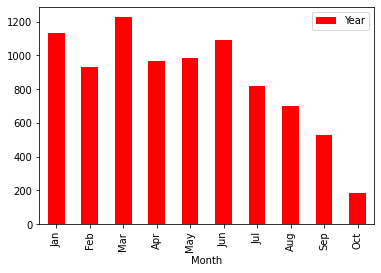

In [0]:
chart = rename.toPandas()
chart.plot.bar(x = 'Month',y = 'Year',color = "Red",width = 0.5)

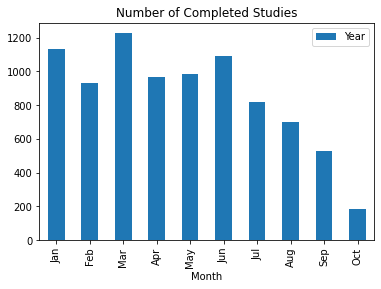

In [0]:
chart.plot(kind = "bar",x='Month',y= 'Year')
plt.title("Number of Completed Studies")
plt.show()